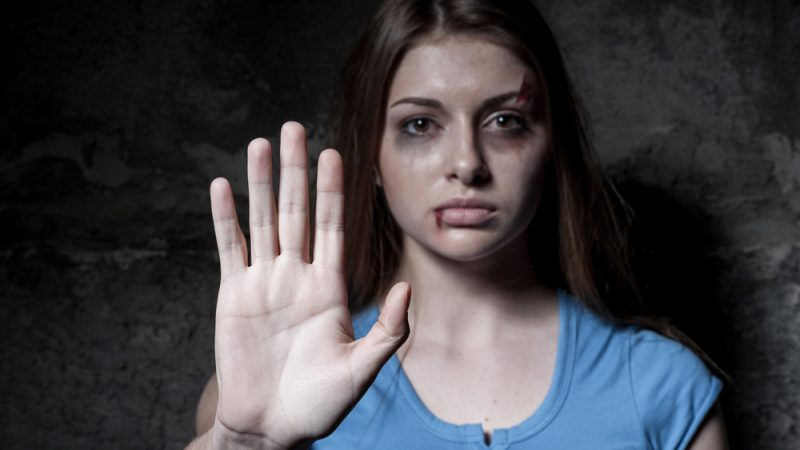

In [248]:
from IPython import display
display.Image('https://www.euractiv.com/wp-content/uploads/sites/2/2019/11/violence-800x450.jpg')

# VIOLENCE AGAINST WOMEN
## Group no 8:

#### ___- Aron Bensimhon___
#### ___- Atalya Asgali___
#### ___- Oriana Felszer___
#### ___- Avichai Gelman___

Link to the data sorce: [Kaggle](https://www.kaggle.com/datasets/andrewmvd/violence-against-women-and-girls) 

Our GitHub: [Team 8](https://github.com/orifelszer/project/blob/main/8.ipynb)

In [249]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from IPython import display

# __Table of Contents__
- [Introduction](#IN)
- [Wrangling](#section1)
   - [Handling missing values](#section1.1)
   - [Fix columns](#section1.2)
   - [Organize data](#section1.3)  
   - [Cleaning data](#section2)
- [Comparisions](#section3)
    - [Education](#section3.1)
    - [Employment](#section3.2)
    - [Gender](#section3.3)
    - [Marital Status](#section3.4)
- [Geographic point of view](#section4)
    - [Residence](#section4.1)
- [Conclusions](#section5)

<a id='IN'></a>
## ___Introduction___
#### __Our data, collected from 70 different "third world" countries, is about violence against women and girls. <br>Most of them from Africa and South-West Asia. <br>The data was divided by countries, gender of the respondents and questions. <br>About the latter we can find: <br>Demographic questions, and for each one a demographic response:__

#### -Age (15-24, 25-34, 35-49)
#### -Education (No Education, Primary, Secondary, Higher)
#### -Employment (Unemployed, Employed for cash, Employed for kind)
#### -Marital status (Maried or living together, widowed, divorced, separated, never married)
#### -Residence (Rural, Urban)

#### __Once they got divided by demographics parameters, respondents were asked if they agreed with the following statements: "A husband is justified in hitting or beating his wife...":__

#### -If she burns the food
#### -If she argues with him
#### -If she goes out without telling him
#### -If she neglects the children
#### -If she refuses to have sex with him
#### -For at least one specific reason

#### __Finally, the values respresent the percentage of people surveyed in the relevant group that agreed with the question__

In [250]:
url= 'https://raw.githubusercontent.com/orifelszer/project/main/violence_data.csv'
data_df= pd.read_csv(url)

In [251]:
data_df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


<a id='section1'></a>
## ___Wrangling___
#### _Missing values_

<a id='section1.1'></a>
___Since we're working with the percentage of people that answered the survey, empty values are irrelevant. So is the record ID because it just represent a numeric value to each question by country.___

In [252]:
data_df = data_df.dropna()

<a id='section1.2'></a>
#### _Fix columns_
___Dropping the columns that are irrelevant to our project:___

In [253]:
irrelevant= ['Survey Year','RecordID']
data_df.drop(irrelevant, axis=1, inplace=True, errors='ignore')

___Proper data:___

In [254]:
data_df

,Country,Gender,Demographics Question,Demographics Response,Question,Value
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8
5,Afghanistan,F,Employment,Employed for kind,... if she burns the food,17.0
...,...,...,...,...,...,...
12595,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,11.8
12596,Zimbabwe,M,Residence,Rural,... if she neglects the children,20.1
12597,Zimbabwe,M,Residence,Urban,... if she neglects the children,15.0
12598,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,7.2


<a id='section1.3'></a>
#### _Organize the data_
___As we can see, our data is a bit disorganized and hard to work with it, so we're going to group it in order to appreciate it better.___

In [255]:
demographics_df = data_df.groupby(["Demographics Question", "Demographics Response"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
demographics_df.columns = ["Question", "Response", "Median", "Max", "Min", "Mean"]
demographics_df= demographics_df.sort_values(["Question", "Median"])
demographics_df

,Question,Response,Median,Max,Min,Mean
2,Age,35-49,14.15,81.0,0.2,19.336412
1,Age,25-34,14.45,81.5,0.1,19.703562
0,Age,15-24,17.50,80.1,0.1,21.084169
3,Education,Higher,4.20,74.6,0.0,8.898670
6,Education,Secondary,13.05,76.7,0.2,17.378892
5,Education,Primary,18.40,80.5,0.1,22.819093
4,Education,No education,21.55,82.0,0.0,25.403125
9,Employment,Unemployed,14.55,80.1,0.0,19.539710
7,Employment,Employed for cash,14.85,81.5,0.1,19.553804
8,Employment,Employed for kind,20.15,86.9,0.3,24.445541


In [256]:
question_df = data_df.groupby(["Question"])["Value"].agg(["median", "max", "min", "mean"]).reset_index()
question_df.columns = ["Question", "Median", "Max", "Min", "Mean"]
print("Violence % median, min, max, and mean per question asked")
question_df = question_df.sort_values(["Median"])
question_df

Violence % median, min, max, and mean per question asked


,Question,Median,Max,Min,Mean
2,... if she burns the food,6.4,56.7,0.0,9.203445
5,... if she refuses to have sex with him,9.0,68.7,0.0,13.209613
1,... if she argues with him,15.7,76.5,0.0,18.983652
3,... if she goes out without telling him,16.4,77.0,0.0,20.046321
4,... if she neglects the children,20.8,75.6,0.0,23.461249
0,... for at least one specific reason,31.0,86.9,0.0,33.217152


<a id='section2'></a>
#### _Clean data_
___We've seen that the answer 'for at least one specific reason' has the greater value and it's not that specific as it says. So we've decided to drop it to focus better on the rest of the questions.___

In [257]:
clean_data=data_df.loc[data_df.Question != '... for at least one specific reason']
clean_data

,Country,Gender,Demographics Question,Demographics Response,Question,Value
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8
5,Afghanistan,F,Employment,Employed for kind,... if she burns the food,17.0
...,...,...,...,...,...,...
12595,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,11.8
12596,Zimbabwe,M,Residence,Rural,... if she neglects the children,20.1
12597,Zimbabwe,M,Residence,Urban,... if she neglects the children,15.0
12598,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,7.2


<a id='section3'></a>
## ___Comparisions___

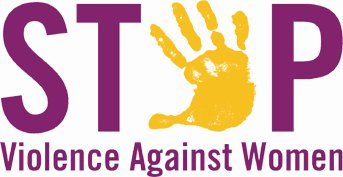

In [258]:
display.Image('http://publish.illinois.edu/globalcurrents/files/2014/10/Stop-Violence-Against-Women-2.jpg')


<a id='section3.1'></a>
### ___Education___

In [259]:
education= clean_data[clean_data.loc[:,"Demographics Question"] == "Education"]

Text(0.5, 0, 'Education level')

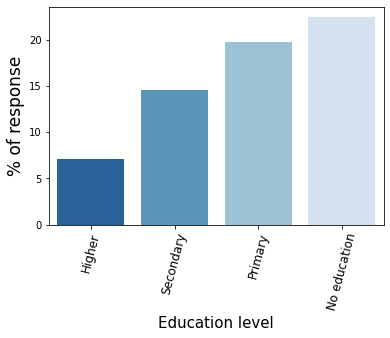

In [260]:
sns.barplot( data= education, y='Value',x='Demographics Response', palette = 'Blues_r',ci=None)
plt.xticks(rotation=75, fontsize= 12)
plt.ylabel('% of response',fontsize=17);
plt.xlabel('Education level',fontsize=15)

__A little bit trivial but we can see that the less educated women are, the more beaten they are. Let's see it in comparision with the question they've been asked:__

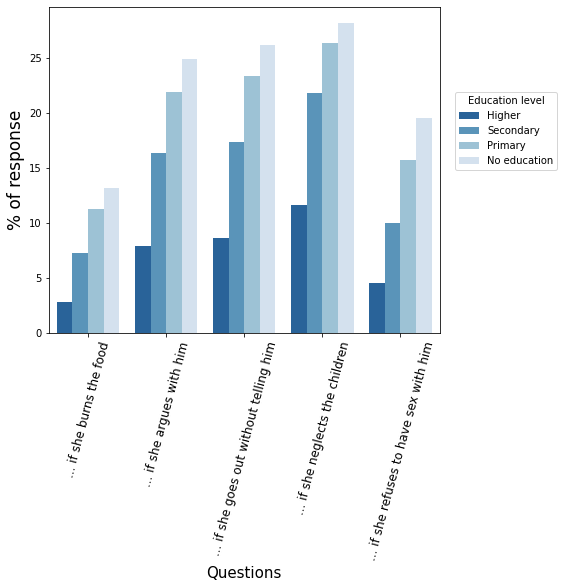

In [261]:
plt.figure(figsize = (7,6))
ax= sns.barplot( data= education, y='Value',x='Question', hue='Demographics Response',ci = None, palette = 'Blues_r');
plt.xticks(rotation=75, fontsize= 12);
plt.legend(title='Education level', loc=(1.04,0.5))
plt.xlabel('Questions',fontsize=15)
plt.ylabel('% of response',fontsize=17);

#### __Observation 1:__
 
#### __The less women got educated, the more violence they experienced no matter the reason.<br> If we, as a society, invest more in instructing people against violence,  we could change the result of these numbers.__

<a id='section3.2'></a>
### ___Employment___

In [262]:
Employment_women= clean_data.loc[clean_data['Demographics Question']== 'Employment']

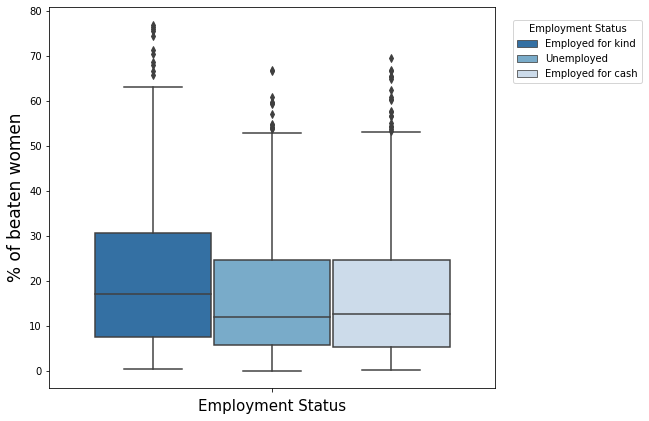

In [263]:
plt.figure(figsize = (8,7));
ax= sns.boxplot( data= Employment_women, y='Value',x='Demographics Question', hue='Demographics Response',palette='Blues_r')
plt.legend(title='Employment Status', loc=(1.04,0.8))
plt.xlabel('Employment Status',fontsize=15)
plt.ylabel('% of beaten women',fontsize=17)
ax.set(xticklabels=[]);

#### __Observation 2:__

#### __There is a connection between women's employment and the percentage of beaten ones. <br>Therefore, we understand from the graph that the highest percentage of beaten women is among the ones who work for kind.__
#### __This conclusion really surprised us since we thought that the unemployed ones will have the greater percentage of violence experienced.__

<a id='section3.3'></a>
### ___Gender___

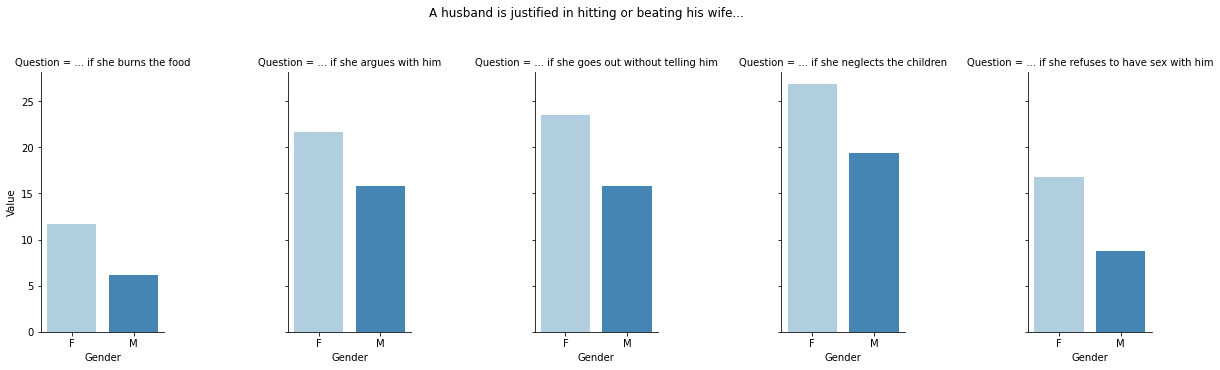

In [290]:
g = sns.catplot(x="Gender", y="Value", col="Question",
                data=clean_data, saturation=.8,
                kind="bar",ci=None, aspect=.64, col_wrap=5, palette ='Blues')
g.fig.suptitle("A husband is justified in hitting or beating his wife...")
g.fig.subplots_adjust(top=.8)
plt.subplots_adjust(wspace = 1);

#### __Observation 3:__

#### __From these graphs we can see that women agree more than men to the survey no matter the reason why a husband would be justified in beating a woman.__

#### ___Something to give a thought about: Are men minimizing the issue or women heigtening it ?___

<a id='section3.4'></a>
### ___Marital Status___

In [265]:
marital = clean_data[clean_data.loc[:,"Demographics Question"] =="Marital status"]

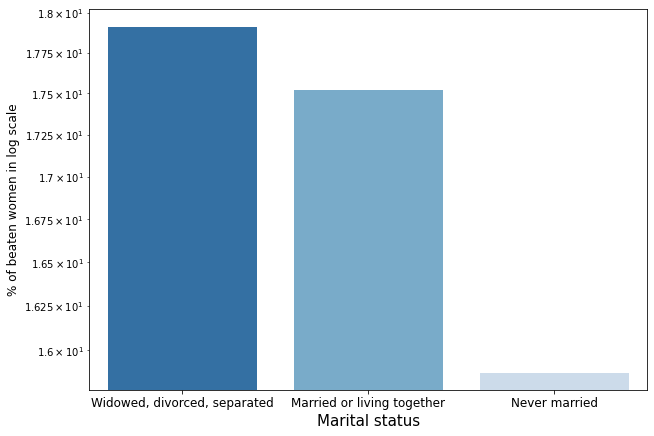

In [266]:
fig= plt.subplots(figsize=(10,7))
dos=sns.barplot( data= marital, y='Value',x='Demographics Response',ci=None, palette = 'Blues_r')
plt.xticks(rotation=0, fontsize= 12)
dos.set_yscale("log")
plt.ylabel('% of beaten women in log scale',fontsize=12)
plt.xlabel('Marital status',fontsize=15);

__When talking about the results of their marital status, we needed to use the log scale since the results were very close. Now, we can appreciate that women that never got married experienced less violence than those who indeed have been married or living togheter with a man.__

<a id='section4'></a>
## __Geographic point of view__

<a id='section4.1'></a>
### ___Residence___

In [267]:
residence= clean_data[clean_data.loc[:,"Demographics Question"] == "Residence"]

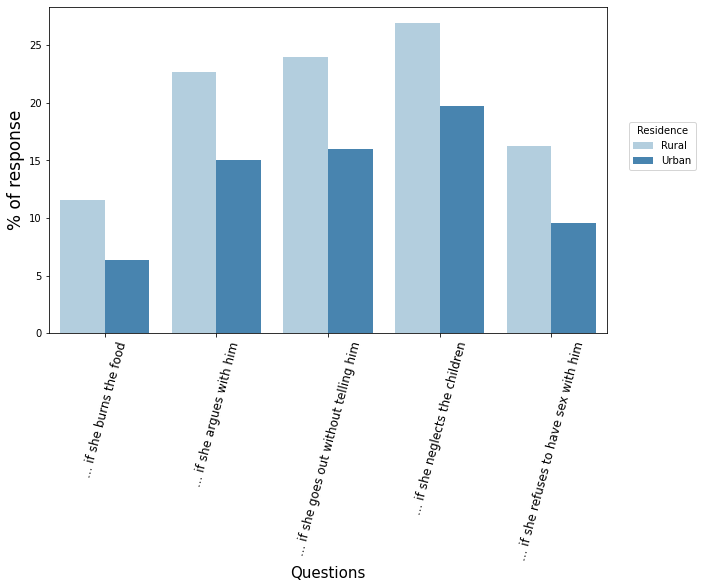

In [268]:
plt.figure(figsize = (10,6))
ax= sns.barplot( data= residence, y='Value',x='Question', hue='Demographics Response',ci = None, palette = 'Blues');
plt.xticks(rotation=75, fontsize= 12);
plt.legend(title='Residence', loc=(1.04,0.5))
plt.xlabel('Questions',fontsize=15)
plt.ylabel('% of response',fontsize=17);

__There's a big difference, when talking about violence against women, between people living in rural zones and the ones living in the urban.__

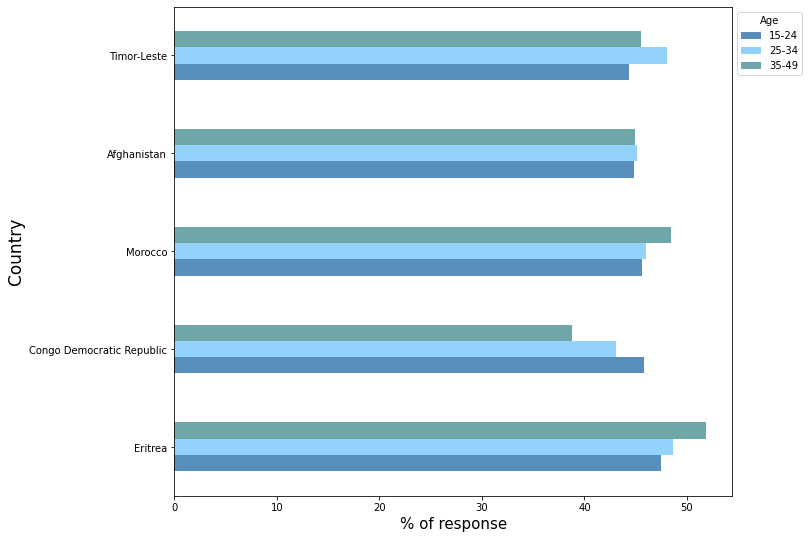

In [299]:
demor_df = data_df.groupby(["Demographics Question", "Demographics Response", "Question", 'Country'])["Value"].agg(["median", "mean"]).reset_index()
demor_df = demor_df.loc[demor_df["Demographics Question"] == 'Age']
demor_df = demor_df.sort_values(by='mean', ascending=False)
#demor_df = demor_df.head(15)
ex=demor_df.pivot_table('median', index='Country', columns='Demographics Response')
demor_df=demor_df.pivot_table('median', index='Demographics Response', columns='Country') 
ex=ex.sort_values(by='15-24',ascending=False)
ex=ex.iloc[:5]
ex.plot(kind='barh',figsize=(10,9),color=['steelblue','lightskyblue','cadetblue'], alpha=0.9)
#plt.legend(title='Age', loc=(1.04,0.8))
plt.xlabel('% of response',fontsize=15)
plt.ylabel('Country',fontsize=17)
plt.legend(bbox_to_anchor=(1,1),title='Age');

#### __Observation 4:__

#### __Among the top 5 countries where women are beaten the most, no difference relevant enough is observable. Thus, we see that beating women is such a habit there that age doesn't even matter.__
   

### _Finally, we're going to show how our data is spread across the wolrd_

In [270]:
demoq_df = clean_data.groupby(["Country","Demographics Question", "Demographics Response", "Question"])["Value"].agg(["median", "mean"]).reset_index()

In [271]:
demoq_df.columns = ["Country","Demographics Question", "Demographics Response", "Question", "Median", "Mean"]
demoq_df = demoq_df.sort_values(["Demographics Question", "Demographics Response", "Median"])
demoq_df.rename(columns = {'Demographics Question':'Age'}, inplace = True)
map_df = demoq_df.loc[demoq_df.Age == 'Age']
map_df.drop(['Age', 'Median'], axis=1)
map_df.pivot_table('Mean', index='Country', columns='Demographics Response') 

Demographics Response,15-24,25-34,35-49
Country,,,
Afghanistan,38.43,38.99,38.69
Albania,2.84,3.36,3.73
Angola,11.48,10.55,10.72
Armenia,6.78,6.81,6.88
Azerbaijan,28.36,28.98,27.10
...,...,...,...
Uganda,25.48,18.86,19.29
Ukraine,1.94,3.06,2.73
Yemen,24.04,25.70,27.96


In [272]:
data_df.pivot_table('Value', index='Country', columns='Demographics Question', aggfunc='median') 

Demographics Question,Age,Education,Employment,Marital status,Residence
Country,,,,,
Afghanistan,46.55,41.05,47.95,39.80,46.35
Albania,3.60,4.00,3.85,3.95,3.40
Angola,12.10,10.80,12.05,12.40,11.90
Armenia,6.80,6.35,8.15,6.25,6.70
Azerbaijan,34.80,35.65,34.35,32.15,35.25
...,...,...,...,...,...
Uganda,23.05,20.05,26.35,26.25,22.05
Ukraine,2.25,2.30,3.00,2.20,2.70
Yemen,30.85,20.15,27.90,30.30,23.90


___Since our data is a DataFrame we need to convert it to a GeopandasDataFrame in order to use it geographically___

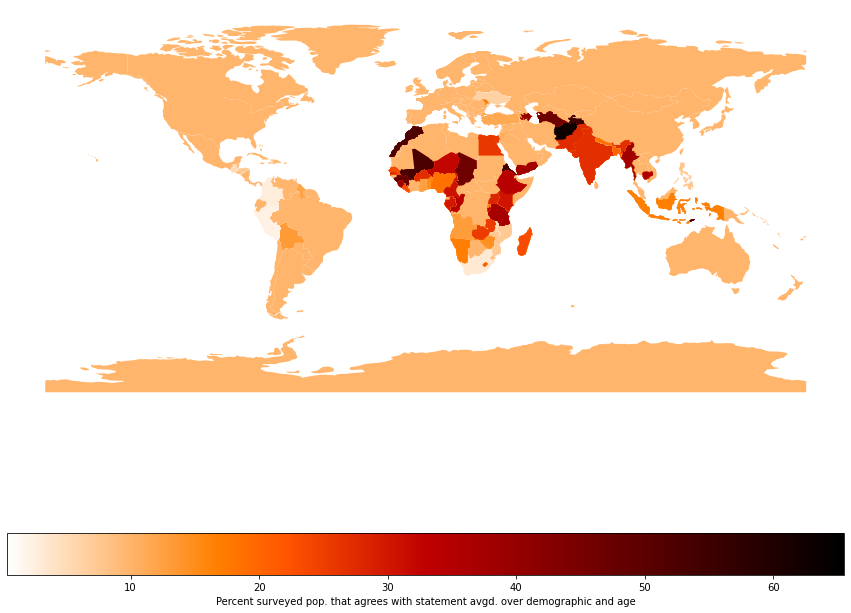

In [273]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
# For attribute join
country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]
# For spatial join
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'Country'})
joined = world.geometry.append(cities.geometry)
country_shapes = country_shapes.merge(country_names, on='iso_a3')
import warnings
warnings.filterwarnings('ignore')
merged_df = country_shapes.merge(map_df, left_on=['name'], right_on=['Country'], how= 'left')
merged_df.sort_values(by='Mean')
merged_df.Median[merged_df.Median.isna()]=10
merged_df.Median[merged_df.Median==0]=5
merged_df.plot(column='Median',cmap='gist_heat_r',figsize=(15,15),legend = True, legend_kwds={'label': 'Percent surveyed pop. that agrees with statement avgd. over demographic and age', 'orientation': "horizontal"})
plt.axis('off');

___Although not all countries in the world are present in our survey we get here a decent image of beaten women around the wolrd.___

___The most affected areas are Central Africa and South-West Asia.___


___Many factors can apply to be a proper reason for such a strong percentage of beaten women such as poverty or terrorism (these areas being very much concerned by those two issues).___

<a id='section5'></a>
# ___Summary___

#### ___We chose this data to raise awareness about violence against women.___
#### ___In the light of this work's insights, the main question leading to high violence is children neglect.___
#### ___Thus,we notice how sensitive family is - we must pay attention to it !___
#### __From the research it can be seen that one of the factors influencing women's resilience to violence is the level of education. The higher the education, the more confident a woman feels about herself and her capacities.__
#### __It is our duty as students to be aware of such an issue and in general, striving for a better education.__
#### ___We look forward to the day when making a project about violented women will be irrelevant.___


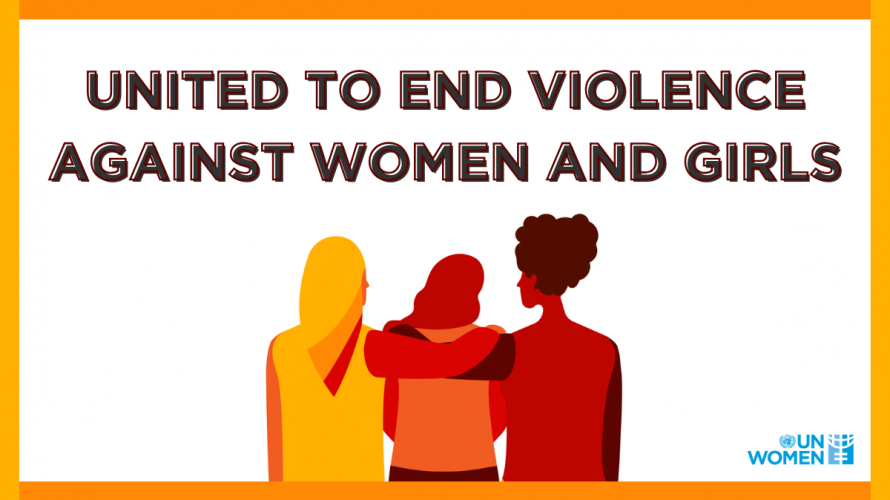

In [274]:
display.Image('https://www.unicef-irc.org/files/images/2047-land_0-asset-1-twitter.png')